In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Preparazione dati

In [ ]:
# Carichiamo il dataset MNIST
# - train_images sono le immagini per la fase di addestramento
# - train_labels sono le etichette associate a queste immagini (numeri da 0 a 9) 

# test_images e test_labels sono simili a train_images e train_labels ma costituiscono 
# i dati per la fase di test (ne parleremo dopo)

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# Occorre trasformare le etichette dal formato numerico originale ad un formato
# confrontabile con l'output del percettrone. Usiamo il metodo predefinito di
# tf.keras.utils.to_categorical.

train_labels_ok = tf.keras.utils.to_categorical(train_labels)
test_labels_ok = tf.keras.utils.to_categorical(test_labels)

In [4]:
# È prassi fornire i dati in input in maniera normalizzata, come numeri compresi
# tra 0 ed 1. Pertanto, anche se non strettamente necessario, dividiamo tutti i
# numeri che compongono una immagine per 255.

train_images_ok = train_images / 255.0
test_images_ok = test_images / 255.0

# La prima rete

In [6]:
# Costruiamo una rete neurale simile al percettrone. Non è esattamente uguale perché la funzione
# di attivazione hard_sigmoid è simile ma non identica alla step function usata nel percettrone.
# Il primo strato (Flatten) ha lo copo di trasformare una immagine di 28 x 28 pixel in un unico vettore
# di 784 elementi, il secondo (Dense) è lo strato di neuroni. Ci sono 10 neuroni, ognuno connesso
# a tutti i 784 pixel dell'immagine.

network = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(10, activation='hard_sigmoid')
])

In [7]:
# Visualizziamo la struttura della rete. Notate che la rete ha 7850 parametri. Ognuno dei 10 neuroni
# di output ha infatti 784 pesi (uno per ogni pixel) ed un valore di bias. In totale quindi sono
# (784 + 1) * 10 = 7850 pesi. Notare che lo strato Flatten eseguo un compito fisso e non ha
# nessun peso associato.

network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Prima di poter usare una rete, bisogna indicare dei parametri addizionali:
# - una funzione di loss, che specifica come valutare le differenze tra il vero valore degli
#   output e quello predetto (mse = scarto quadrarico medio)
# - l'algoritmo di ottimizzazione che viene usato per aggiornare i pesi della rete 
#   nel tentativodi ridurre la funzione di loss (sgd = stochastic gradient descend)
# - metriche da visualizzare durante l'addestramento (in questo caso visualizziamo l'accuratezza, la
#   percentuale di istanze classificate correttamente nell'insieme di addestramento)

network.compile(optimizer='sgd', loss='mse', metrics=['accuracy'])

In [9]:
# Lanciamo l'addestramento della rete:
# - batch_size è il numero di istanze su cui addestrare i pesi as ogni passo
# - epochs è il numero di volte per cui ripetere l'addestramento sull'intero
#   insieme di training (ogni volta usando come punto di partenza i pesi trovati
#   nell'epoca precedente)
# Restituisce la storia dell'addestramento

history = network.fit(train_images_ok, train_labels_ok, epochs=15, batch_size=128)

Epoch 1/15
469/469 [==============================] - 2s 3ms/step - loss: 0.1625 - accuracy: 0.0907
Epoch 2/15
469/469 [==============================] - 1s 3ms/step - loss: 0.0993 - accuracy: 0.2483
Epoch 3/15
469/469 [==============================] - 1s 3ms/step - loss: 0.0890 - accuracy: 0.4139
Epoch 4/15
469/469 [==============================] - 1s 2ms/step - loss: 0.0834 - accuracy: 0.5260
Epoch 5/15
469/469 [==============================] - 1s 2ms/step - loss: 0.0790 - accuracy: 0.5973
Epoch 6/15
469/469 [==============================] - 1s 2ms/step - loss: 0.0753 - accuracy: 0.6407
Epoch 7/15
469/469 [==============================] - 1s 3ms/step - loss: 0.0721 - accuracy: 0.6712
Epoch 8/15
469/469 [==============================] - 1s 3ms/step - loss: 0.0692 - accuracy: 0.6950
Epoch 9/15
469/469 [==============================] - 1s 3ms/step - loss: 0.0667 - accuracy: 0.7138
Epoch 10/15
469/469 [==============================] - 1s 3ms/step - loss: 0.0645 - accuracy: 0.7291

In [10]:
# Valutiamo adesso il funzionamento della rete su immagini nuove, che non fanno
# parte dell'insieme di addestramento. Usiamo a tale scopo il metodo evaluate
# e l'insieme di test. Notiamo che l'accuratezza è simile a quella sull'insieme
# di addestramento, ma non sarà sempre così.

network.evaluate(test_images_ok, test_labels_ok)

313/313 [==============================] - 1s 2ms/step - loss: 0.0550 - accuracy: 0.7797


[0.055031999945640564, 0.779699981212616]

In [12]:
# Definiamo un funzione per visualizzare l'andamento dell'errore di addestramento
# e della funzione di loss nel corso delle epoche.

def display_loss_and_accuracy(history):
  history_dict = history.history
  loss_values = history_dict['loss']
  accuracy_values = history_dict['accuracy']
  epochs = range(1, len(loss_values) + 1)

  plt.plot(epochs, loss_values, 'bo', label='Training loss')
  plt.title('Training loss w.r.t epochs')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

  plt.plot(epochs, accuracy_values, 'bo', label='Accuracy')
  plt.title('Accuracy w.r.t. epochs')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

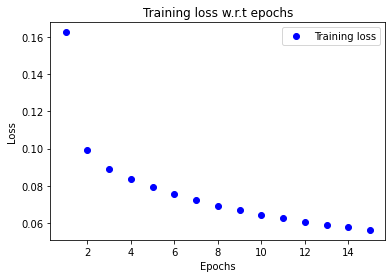

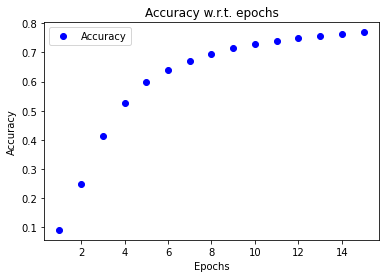

In [13]:
display_loss_and_accuracy (history)

# Verso una rete più efficiente

In [14]:
# Iniziamo semplicemente aumentando il numero di epoche. L'accuratezza aumenta,
# ma sempre più lentamente quanto più si va avanti con le epoche. 

network2 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(10, activation='hard_sigmoid')
])
network2.compile(optimizer='sgd', loss='mse', metrics=['accuracy'])
history2 = network2.fit(train_images_ok, train_labels_ok, epochs=50, batch_size=128)

Epoch 1/50
469/469 [==============================] - 2s 3ms/step - loss: 0.1492 - accuracy: 0.1312
Epoch 2/50
469/469 [==============================] - 1s 2ms/step - loss: 0.0974 - accuracy: 0.2821
Epoch 3/50
469/469 [==============================] - 1s 3ms/step - loss: 0.0879 - accuracy: 0.4385
Epoch 4/50
469/469 [==============================] - 1s 3ms/step - loss: 0.0826 - accuracy: 0.5450
Epoch 5/50
469/469 [==============================] - 1s 2ms/step - loss: 0.0783 - accuracy: 0.6087
Epoch 6/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0747 - accuracy: 0.6500
Epoch 7/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0715 - accuracy: 0.6800
Epoch 8/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0687 - accuracy: 0.7012
Epoch 9/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0663 - accuracy: 0.7190
Epoch 10/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0641 - accuracy: 0.7328

In [15]:
network2.evaluate(test_images_ok, test_labels_ok)

313/313 [==============================] - 1s 2ms/step - loss: 0.0366 - accuracy: 0.8466


[0.03662368655204773, 0.8465999960899353]

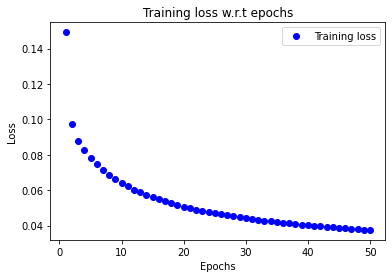

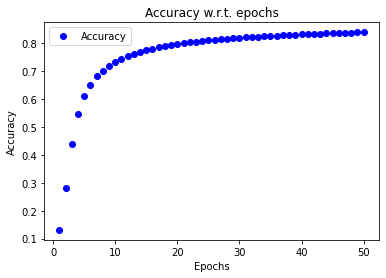

In [16]:
display_loss_and_accuracy(history2)

In [17]:
# Aumentiamo il learning rate, ovvero la misura di quanto muoversi lungo la direzione
# del gradiente ad ogni passo. Nel parametro optimizer del metodo compile, invece
# di usare il metodo predefinito SGD (che ha learning rate 0.001), creiamo una
# nuova istanza della classe SGD specificando manualmente il learning rate (0.1).

network3 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(10, activation='hard_sigmoid')
])
network3.compile(optimizer=tf.keras.optimizers.SGD(0.1), loss='mse', metrics=['accuracy'])
history3 = network3.fit(train_images_ok, train_labels_ok, epochs=50, batch_size=128) 

Epoch 1/50
469/469 [==============================] - 1s 3ms/step - loss: 0.0870 - accuracy: 0.5086
Epoch 2/50
469/469 [==============================] - 1s 2ms/step - loss: 0.0574 - accuracy: 0.7503
Epoch 3/50
469/469 [==============================] - 1s 2ms/step - loss: 0.0479 - accuracy: 0.8048
Epoch 4/50
469/469 [==============================] - 1s 3ms/step - loss: 0.0426 - accuracy: 0.8234
Epoch 5/50
469/469 [==============================] - 1s 3ms/step - loss: 0.0392 - accuracy: 0.8333
Epoch 6/50
469/469 [==============================] - 1s 3ms/step - loss: 0.0368 - accuracy: 0.8415
Epoch 7/50
469/469 [==============================] - 1s 3ms/step - loss: 0.0350 - accuracy: 0.8471
Epoch 8/50
469/469 [==============================] - 1s 3ms/step - loss: 0.0336 - accuracy: 0.8516
Epoch 9/50
469/469 [==============================] - 1s 2ms/step - loss: 0.0325 - accuracy: 0.8555
Epoch 10/50
469/469 [==============================] - 1s 3ms/step - loss: 0.0315 - accuracy: 0.8585

In [18]:
network3.evaluate(test_images_ok, test_labels_ok)

313/313 [==============================] - 1s 2ms/step - loss: 0.0212 - accuracy: 0.8982


[0.02118261530995369, 0.8981999754905701]

In [19]:
# Ma se si aumenta troppo il learning rate, le cose non vanno molto bene. 

network4 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(10, activation='hard_sigmoid')
])
network4.compile(optimizer=tf.keras.optimizers.SGD(20), loss='mse', metrics=['accuracy'])
history4 = network4.fit(train_images_ok, train_labels_ok, epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0906 - accuracy: 0.2045
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0895 - accuracy: 0.2093
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0895 - accuracy: 0.2091
Epoch 4/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0894 - accuracy: 0.2092
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0894 - accuracy: 0.2092
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0894 - accuracy: 0.2092
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0894 - accuracy: 0.2091
Epoch 8/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0894 - accuracy: 0.2091
Epoch 9/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0894 - accuracy: 0.2091
Epoch 10/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0894 - accuracy: 0.2092

In [20]:
# Oltre a cambiare il learning rate, possiamo cambiare l'algoritmo di ottimizzazione
# Qui usiamo ADAM invece di SGD. ADAM cerca di cambia dinamicamente il valroe
# del learning rate sulla base della situazione.

network5 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(10, activation='hard_sigmoid')
])
network5.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
history5 = network5.fit(train_images_ok, train_labels_ok, epochs=50, batch_size=128)

Epoch 1/50
469/469 [==============================] - 2s 3ms/step - loss: 0.0527 - accuracy: 0.7374
Epoch 2/50
469/469 [==============================] - 1s 3ms/step - loss: 0.0266 - accuracy: 0.8756
Epoch 3/50
469/469 [==============================] - 1s 3ms/step - loss: 0.0225 - accuracy: 0.8896
Epoch 4/50
469/469 [==============================] - 1s 3ms/step - loss: 0.0206 - accuracy: 0.8964
Epoch 5/50
469/469 [==============================] - 1s 2ms/step - loss: 0.0195 - accuracy: 0.9010
Epoch 6/50
469/469 [==============================] - 1s 3ms/step - loss: 0.0187 - accuracy: 0.9035
Epoch 7/50
469/469 [==============================] - 1s 3ms/step - loss: 0.0181 - accuracy: 0.9064
Epoch 8/50
469/469 [==============================] - 1s 3ms/step - loss: 0.0176 - accuracy: 0.9079
Epoch 9/50
469/469 [==============================] - 1s 3ms/step - loss: 0.0172 - accuracy: 0.9100
Epoch 10/50
469/469 [==============================] - 1s 3ms/step - loss: 0.0169 - accuracy: 0.9119

In [21]:
network5.evaluate(test_images_ok, test_labels_ok)

313/313 [==============================] - 1s 2ms/step - loss: 0.0143 - accuracy: 0.9210


[0.014344210736453533, 0.9210000038146973]

## Una rete multistrato

In [22]:
# Costruiamo una rete neurale più complessa costituita da due strati e con una 
# diversa funzione di attivazione.

network6 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
network6.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history6 = network6.fit(train_images_ok, train_labels_ok, epochs=30, batch_size=128)

Epoch 1/30
469/469 [==============================] - 5s 10ms/step - loss: 0.2706 - accuracy: 0.9223
Epoch 2/30
469/469 [==============================] - 4s 9ms/step - loss: 0.1071 - accuracy: 0.9687
Epoch 3/30
469/469 [==============================] - 4s 9ms/step - loss: 0.0695 - accuracy: 0.9795
Epoch 4/30
469/469 [==============================] - 4s 9ms/step - loss: 0.0500 - accuracy: 0.9849
Epoch 5/30
469/469 [==============================] - 4s 9ms/step - loss: 0.0366 - accuracy: 0.9893
Epoch 6/30
469/469 [==============================] - 4s 9ms/step - loss: 0.0268 - accuracy: 0.9923
Epoch 7/30
469/469 [==============================] - 5s 10ms/step - loss: 0.0204 - accuracy: 0.9944
Epoch 8/30
469/469 [==============================] - 4s 9ms/step - loss: 0.0151 - accuracy: 0.9963
Epoch 9/30
469/469 [==============================] - 4s 9ms/step - loss: 0.0127 - accuracy: 0.9967
Epoch 10/30
469/469 [==============================] - 4s 8ms/step - loss: 0.0094 - accuracy: 0.99

In [23]:
# Il numero di pesi è adesso molto più grande.

network6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 512)               401920    
                                                                 
 dense_6 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [24]:
# Notare che l'accuratezza sull'insieme di test adesso è minore che sull'insieme
# di addestramento.

network6.evaluate(test_images_ok, test_labels_ok)

313/313 [==============================] - 1s 3ms/step - loss: 0.0766 - accuracy: 0.9831


[0.07663792371749878, 0.9830999970436096]

In [25]:
# Deteminiamo quali sono le immagini dove la nostra rete sbaglia (nell'insieme di test).

test_predictions6 = network6.predict(test_images_ok)
np.where([ np.argmax(x) for x in test_predictions6] != test_labels)

(array([ 115,  149,  247,  321,  340,  445,  449,  582,  619,  684,  691,
         720,  882,  947,  951,  956,  965, 1014, 1039, 1112, 1156, 1226,
        1232, 1242, 1247, 1319, 1328, 1393, 1395, 1494, 1522, 1530, 1549,
        1609, 1681, 1754, 1790, 1878, 1901, 1941, 1984, 1987, 2004, 2035,
        2053, 2070, 2098, 2109, 2118, 2130, 2135, 2182, 2272, 2293, 2387,
        2408, 2488, 2597, 2607, 2648, 2654, 2720, 2730, 2810, 2877, 2915,
        2921, 2939, 2953, 2995, 3073, 3117, 3225, 3289, 3422, 3503, 3520,
        3558, 3559, 3567, 3597, 3751, 3780, 3796, 3808, 3818, 3838, 3853,
        3906, 3943, 3976, 3985, 4027, 4065, 4078, 4163, 4176, 4199, 4201,
        4248, 4271, 4289, 4294, 4425, 4497, 4536, 4601, 4731, 4740, 4761,
        4807, 4823, 4860, 4879, 4880, 4956, 5331, 5457, 5642, 5676, 5734,
        5749, 5936, 5937, 5955, 5972, 5973, 5981, 5982, 5997, 6011, 6023,
        6024, 6059, 6555, 6559, 6571, 6574, 6576, 6597, 6625, 6755, 6783,
        6847, 7216, 8062, 8094, 8246, 

Predizione:  9
Valore effettivo:  2


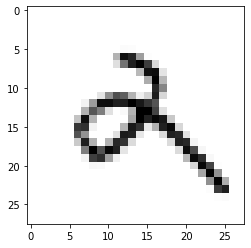

In [27]:
# Controlliamo ad esempio l'immagine 149

print("Predizione: ", np.argmax(test_predictions6[149]))
print("Valore effettivo: ", test_labels[149])

plt.imshow(test_images_ok[149], cmap= plt.cm.binary)

# Esercizio: classificazione del set di dati CIFAR 10

CIFAR 10 è un insieme di 60.000 immagini 32x32 a colori, di cui 50.000 per l'addestramento e 10.000 per il test. Ogni immagine può appartenere ad una di 10 possibili categorie: 

* 0 	airplane
* 1 	automobile
* 2 	bird
* 3 	cat
* 4 	deer
* 5 	dog
* 6 	frog
* 7 	horse
* 8 	ship
* 9 	truck

## Preparazione dati

In [28]:
# Caricamento dell'insieme di dati

(cifar_train_images, cifar_train_labels), (cifar_test_images, cifar_test_labels) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [29]:
# cifar_train_images è un array a 4 dimensioni. L'ultima dimensione è il canale colore (Red, Green e Blue)

cifar_train_images.shape

(50000, 32, 32, 3)

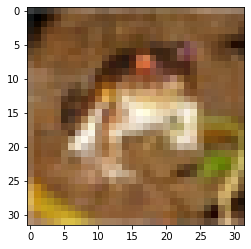

In [30]:
plt.imshow(cifar_train_images[0])